In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2

In [2]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

In [4]:
for i = eachindex(Cavg)
    if Cavg[i] < 1
        print(i*0.1 , " ")
        break
    end
end

6.6000000000000005 

In [5]:
t = 9
i = Integer(floor(t/0.1))+1
v = ones(1,i)'-Cavg[1:i]
min = maximum(v)
idx = argmax(v)[1]*0.1
print(min, " ", idx)


1.113775738303957e-12 7.300000000000001

d = f(dt, t)

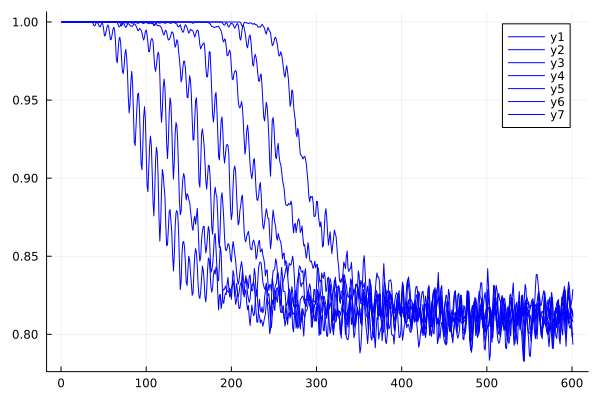

In [82]:
t = 30
n = Integer(floor(t/0.1))+1
v = []
Mtrue = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\10000.jld2", "M")
solvers = [RK4]
colors = [:Blue :Red]
p = plot()
for i = 1
    for k = [10 20 40 80 160 320 640]
        str = string("Variables", "\\", "SolutionMatrices", "\\", solvers[i], "\\", k, ".jld2")
        Mest = FileIO.load(str, "M")
        C = CorrelationMatrix(Mest,Mtrue,1331,601)
        Cavg = sum(C,dims=1)/1331
        # push!(v,1-minimum(Cavg[1:n]))
        plot!(p,Cavg',color=colors[i])
    end
end
display(p)

In [33]:
Mest = FileIO.load(raw"Variables\SolutionMatrices\RK4\160.jld2", "M")
Mtrue = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\10000.jld2", "M")
C = CorrelationMatrix(Mest,Mtrue,1331,601)
Cavg = sum(C,dims=1)/1331
;

In [ ]:
t = 9
i = Integer(floor(t/0.1))+1
v = ones(1,i)'-Cavg[1:i]
min = maximum(v)
idx = argmax(v)[1]*0.1
print(min, " ", idx)

In [164]:
d = 0.025
v1 = []
v2 = []
p2 = plot()
p3 = plot()
for d = 0.01:0.01:0.15
    for solver = [Rodas5]
        v = []
        for k = [10 20 40 80 160 320 640]
            str = string("Variables", "\\", "SolutionMatrices", "\\", solver, "\\", k, ".jld2")
            Mest = FileIO.load(str, "M")
            C = CorrelationMatrix(Mest,Mtrue,1331,601)
            Cavg = sum(C,dims=1)/1331

            min = 1
            minidx = 1
            for i = 1:601
                if Cavg[i] <= min && (1 - Cavg[i]) <= d
                    minidx = i
                end
            end
            push!(v,minidx*0.1)
        end
        plot!(p2, [0.1/10, 0.1/20, 0.1/40, 0.1/80, 0.1/160, 0.1/320, 0.1/640], v)
        plot!(p3, [10 20 40 80 160 320 640]', v)
        push!(v1, v)
    end
end

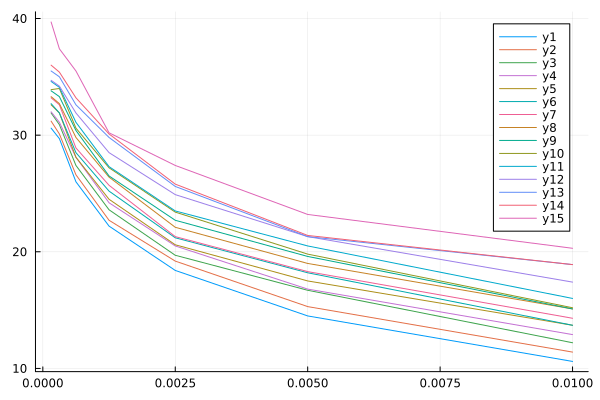

In [165]:
display(p2) 

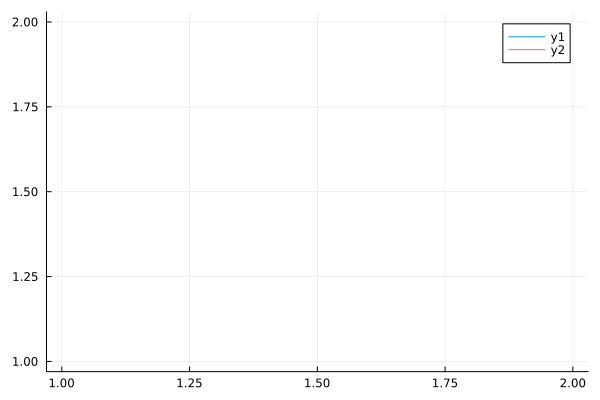

In [144]:
plot([1, 2], [1, 2])